In [0]:
#@title
import networkx as nx
from networkx.algorithms import bipartite
import random
import copy
from random import choice
import matplotlib.pyplot as plt
import math
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


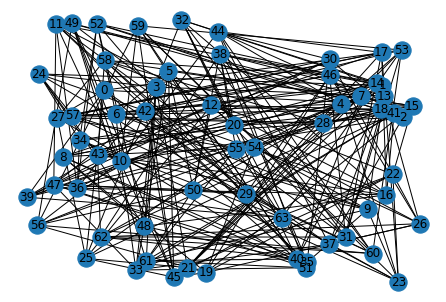

In [3]:
#Complete graph have degree d and d+1 node
#construct R-Jellyfish
def RJellyfish(n,d):
  #make a graph
  G = nx.Graph()
  #add n node to the graph
  G.add_nodes_from(range(0,n))
  #a list of nodes has degree d
  fullDegree=[]
  #a list of node has degree less than d
  leftOver=[]
  #count to break out loop when cannot add more edges
  count=0
  while(True):
  # for i in range(0,100000):
    if len(fullDegree)==n or len(fullDegree)==n-1: break
    if len(fullDegree)==n-2 or len(fullDegree)==n-3:
      count+=1
      if count==20: break
    #randomly choose a edge
    leftOver=[i for i in range(0,n) if i not in fullDegree]
    # print('full',fullDegree)
    # print('left',leftOver)
    u= choice(leftOver)
    v= choice(leftOver)
    # print('has edge',u,v,G.has_edge(u,v))
    if not G.has_edge(u,v) and u!=v and G.degree(u)<d and G.degree(v)<d:
      G.add_edge(u,v)
    if G.degree(u)==d: fullDegree.append(u)
  
  leftOver=[i for i in range(0,n) if i not in fullDegree]
  # print(leftOver) 
  for x in leftOver:
    # print('enter for', G.degree(x))
    fixLinks=True
    if G.degree(x)<=d-2:
      while fixLinks:
        u=random.randint(0,G.number_of_nodes())
        v=random.randint(0,G.number_of_nodes())
        if G.has_edge(u,v) and not G.has_edge(x,u) and not G.has_edge(x,v):
          # print('enter if')
          G.remove_edge(u,v)
          G.add_edge(x,u)
          G.add_edge(x,v)
          fixLinks=False
          # print('end if')
    # print('end for', G.degree(x))
  
  

  return G

#test
for i in range(0,100):
  R=RJellyfish(64,8)
nx.draw_random(R,with_labels = True)

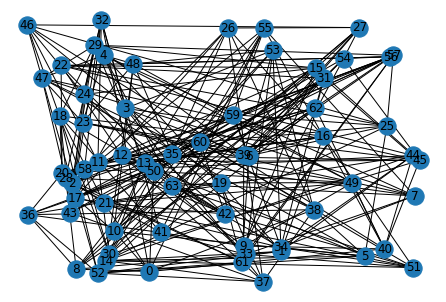

In [4]:
#@title
#construct I-Jellyfish

def IJellyfish(n,d):
  G=nx.complete_graph(d+1)
  for x in range (d+1,n):
    G.add_node(x)
    while G.degree(x) != d:
      u=random.randint(0,G.number_of_nodes())
      v=random.randint(0,G.number_of_nodes())
      if G.has_edge(u,v) and not G.has_edge(x,u) and not G.has_edge(x,v):
        G.remove_edge(u,v)
        G.add_edge(x,u)
        G.add_edge(x,v)
  return G


#test
I=IJellyfish(64,8)
#IEcmp_paths=compute_ecmp_paths(I,64)
nx.draw_random(I,with_labels = True)

64


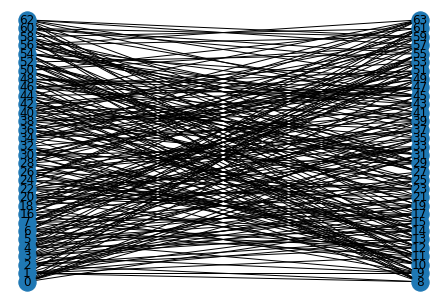

In [5]:
#@title
#construct B-Jellyfish
def BJellyfish(n,d):
  #create complete bipartite graph with d nodes each side
  G=nx.complete_bipartite_graph(d,d)
  left, right = nx.bipartite.sets(G)
  #top = nx.bipartite.sets(G)[0]
  #pos = nx.bipartite_layout(G, top)
  #nx.draw(G, pos=pos)

  L = 2*d
  while L<n:
    R= L+1
    #create list of (uk,vk)
    list1=[]
    #list length = d-1
    while len(list1) != (d-1):
      add=True
      u=random.randint(0,G.number_of_nodes()-1)
      v=random.randint(0,G.number_of_nodes()-1)
      if G.has_edge(u,v):
        for t in list1:
          #print('u,v ' , (u in t) , (v in t))
          if ((u in t) or (v in t)): add = False
        if add == True: list1.append((u,v))
    #remove edge (uk,vk) and add to new node L and R
    G.add_node(L, bipartite=0)
    G.add_node(R, bipartite=1)
    for t in list1:
      u, v = t[0], t[1]
      #print(u,v)
      G.remove_edge(u,v)
      if u in left: 
        G.add_edge(u,R)
        G.add_edge(L,v)
      else:
        G.add_edge(v,R)
        G.add_edge(L,u)
    left, right = nx.bipartite.sets(G)
    L= L+2
  return G


#test
B=BJellyfish(64,8)
print(B.number_of_nodes())
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos,with_labels = True)


In [6]:
#@title
#ECMP
def compute_ecmp_paths(G, n):
  ecmp_paths = {}
  file_name = "temp"
  nx.write_adjlist(G, file_name)
  G1 = nx.read_adjlist(file_name)
  for a in range(n):
    for b in range(a+1, n):
      shortest_paths = nx.all_shortest_paths(G1, source=str(a), target=str(b))
      ecmp_paths[(str(a), str(b))] = [p for p in shortest_paths]
  return ecmp_paths

#test  
d=8
n=64
I=IJellyfish(64,8)

print ("Computing ECMP paths")
ecmp_paths = {}
ecmp_paths = compute_ecmp_paths(I, n)
print(len(ecmp_paths))
print(ecmp_paths)

Computing ECMP paths
2016
{('0', '1'): [['0', '46', '1'], ['0', '54', '1']], ('0', '2'): [['0', '43', '2']], ('0', '3'): [['0', '46', '3']], ('0', '4'): [['0', '27', '39', '4'], ['0', '46', '39', '4'], ['0', '43', '2', '4'], ['0', '44', '34', '4'], ['0', '52', '8', '4']], ('0', '5'): [['0', '6', '5']], ('0', '6'): [['0', '6']], ('0', '7'): [['0', '27', '7']], ('0', '8'): [['0', '52', '8']], ('0', '9'): [['0', '6', '21', '9'], ['0', '46', '21', '9'], ['0', '54', '21', '9'], ['0', '6', '24', '9'], ['0', '27', '26', '9'], ['0', '46', '23', '9'], ['0', '54', '23', '9'], ['0', '52', '33', '9'], ['0', '59', '33', '9']], ('0', '10'): [['0', '6', '13', '10'], ['0', '27', '22', '10'], ['0', '44', '22', '10'], ['0', '59', '22', '10'], ['0', '52', '63', '10'], ['0', '59', '19', '10']], ('0', '11'): [['0', '6', '5', '11'], ['0', '27', '22', '11'], ['0', '44', '22', '11'], ['0', '59', '22', '11'], ['0', '43', '49', '11'], ['0', '52', '49', '11'], ['0', '46', '31', '11'], ['0', '59', '31', '11'], ['

In [0]:
#@title
#Modified add weight function from homework 3
def addWeight(u,v,w,weightMatrix):
  weightMatrix[(str(u),str(v))].append([str(w)])
  # print(weightMatrix)
  return weightMatrix

#Modified trace function from homework 3
def trace(u,v,paths,weight,weightMatrix):
  # print('trace before if ', u, paths[0])
  if u==paths[0]:
    # print('enter trace 1 if')
    start=paths.pop(0)
    while start!=v:
      end=paths.pop(0)
      # print('u,v,w',start,end,weight)
      weightMatrix = addWeight(start,end,weight,weightMatrix)
      start=end
  return weightMatrix


#Modified add weight function from homework 3
def addWeightAll(u,v,w,p,weightMatrix,numVertex):
  leng=len(p)
  if leng==0:
    pass
  elif leng==1:
    paths=p[0][:]
    # print('a',paths)
    weightMatrix = trace(u,v,paths,w,weightMatrix)
  else:
    temList=[]
    for i in range(0,leng):
      if u==p[i][0]:
          #print(p[i][1])
          temList.append(p[i][1])
    temList = list(set(temList))
    num=len((temList))
    #print('temList',temList,num)
    #newWeight=int(math.ceil((float(w)/float(num))))
    newWeight=((float(w)/float(num)))
    #print('newWeight',newWeight,w)
    newPaths={new_list: [] for new_list in range(numVertex)} 
    for i in range(len(temList)):
      #print('addWeight',u,temList[i],newWeight)
      weightMatrix = addWeight(u,temList[i],newWeight,weightMatrix)
    for i in range(0,leng):
      #print(newPaths)
      key=p[i][1]
      (newPaths[key]).append(p[i][1:])
    #print(newPaths)
    for i in newPaths:
#                    #print('enter loop', i)
      if len(newPaths[i])>0:
#                        print('enter if',i)
        weightMatrix = addWeightAll(newPaths[i][0][0],v,newWeight,newPaths[i],weightMatrix,numVertex)
  return weightMatrix


Trafic Matrix: 
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 1, 0, 1]
[1, 0, 1, 0]
ECMP Paths: 
('0', '1') : [['0', '1']]
('0', '2') : [['0', '3', '2'], ['0', '1', '2']]
('0', '3') : [['0', '3']]
('1', '2') : [['1', '2']]
('1', '3') : [['1', '0', '3'], ['1', '2', '3']]
('2', '3') : [['2', '3']]
Throughput =  0.5


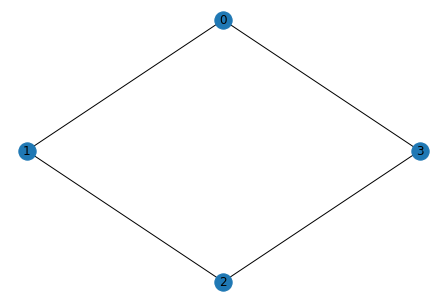

In [8]:
#@title
#calculate throughput with graph G, trafix matrix, ecmp paths list
def throughput(G, matrix,ecmp):
  r = 0.0
  weight=1
  weightMatrix = {}
  for t in G.edges():  
    weightMatrix.update({(str(t[0]),str(t[1])):[]})
    weightMatrix.update({(str(t[1]),str(t[0])):[]})
  #print((weightMatrix))
  #go through the trafic matrix to add weight or load
  for i in range(0,len(matrix)):
    for j in range(0,len(matrix[i])):
      if matrix[i][j] > 0 and not i==j:
        # print("matrix ",i,j)
        if (str(i),str(j)) in ecmp:
          paths= ecmp[(str(i),str(j))]
          temPaths=[]
          for t in paths: 
            t = [int(i) for i in t] 
            temPaths.append(t)
          paths = temPaths[:]
          # print(paths)
          weightMatrix = addWeightAll(i,j,weight,paths,weightMatrix,G.number_of_nodes())
        else:
          paths= ecmp[(str(j),str(i))]
          temPaths=[]
          for t in paths: 
            t = [ele for ele in reversed(t)] 
            t = [int(i) for i in t] 
            temPaths.append(t)
          paths = temPaths[:]
          # print('test paths i j ',paths, i , j)
          weightMatrix = addWeightAll(i,j,weight,paths,weightMatrix,G.number_of_nodes())
  
  #print(G.edges())
  # print(weightMatrix)
  #find max load
  max=-1
  
  for t in weightMatrix:
    sum=0
    for t1 in weightMatrix[t]:
      t1=float(t1[0])
      sum=sum+t1
    weightMatrix[t]=sum
    if max < sum: max = sum

  # print(weightMatrix)
  r=1/max
  return r

#test
G = nx.Graph()
G.add_nodes_from(range(0,4))
G.add_edges_from([(0,3),(0,1),(2,3),(2,1)])
nx.draw_spectral(G,with_labels = True)

matrix= [[0,0,1,1],[0,0,1,1],[0,1,0,1],[1,0,1,0]]
print("Trafic Matrix: ")
for t in matrix:
  print(t)
ecmp_paths=compute_ecmp_paths(G,G.number_of_nodes())
print("ECMP Paths: ")
for t in ecmp_paths:
  print(t,':',ecmp_paths[t])
r = throughput(G,matrix,ecmp_paths)
print("Throughput = ",r)



In [9]:

#calculate throughput of 3 topology by each node will send r amount of traffic to each of the other nodes.
def AllToAll(t):
  #create 3 topology
  n=t[0]
  d=t[1]
  R=RJellyfish(n,d)
  I=IJellyfish(n,d)
  B=BJellyfish(n,d)

  #all-to-all case
  #make empty maxtries
  RMatrix=[ [ 1 for i in range(n) ] for j in range(n) ]
  IMatrix=[ [ 1 for i in range(n) ] for j in range(n) ]
  BMatrix=[ [ 1 for i in range(n) ] for j in range(n) ]

  #find ecmp for 3 graphs
  REcmp_paths=compute_ecmp_paths(R,n)
  IEcmp_paths=compute_ecmp_paths(I,n)
  BEcmp_paths=compute_ecmp_paths(B,n)
  # print('ecmp',REcmp_paths)

  # print(REcmp_paths)
  # print(IEcmp_paths)
  # print(BEcmp_paths)

  #find throughput of 3 graphs
  Rr = throughput(R,RMatrix,REcmp_paths)
  Ir = throughput(I,IMatrix,IEcmp_paths)
  Br = throughput(B,BMatrix,BEcmp_paths)

  print(Rr)
  print(Ir)
  print(Br)
  
  return (Rr,Ir,Br)
  # return Rr

#test
AllToAll([64,8])

0.03784082078542229
0.03918093194645274
0.03110271831410571


(0.03784082078542229, 0.03918093194645274, 0.03110271831410571)

In [10]:
#make random trafic matrix
def RandomMatrix(G,n,d):

  #make empty maxtries
  matrix=[ [ 0 for i in range(n) ] for j in range(n) ]

  #randomly choose first node
  startNode = random.randint(0,n-1)
  nextNode = startNode
  #print(startNode)
  #find next node
  visited=[]
  fullMatrix = False
  while not fullMatrix:
    findNode = False
    startNode = nextNode
    while not findNode:
      nextNode =random.randint(0,n-1)
      #print(nextNode)
      if nextNode not in visited and startNode!=nextNode:
        visited.append(nextNode)
        findNode=True
    matrix[startNode][nextNode]=1
    if len(visited) == n: fullMatrix = True
  # print (visited)
  return matrix

#test
R = RJellyfish(16,4)
RandomMatrix(R,16,4)

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [11]:
#calculate the throughput by Random permutation the traffic matrix is determined by considering each node in some (arbitrary) sequence.
def RandomPermutation(t):
  
  #create 3 topology
  n=t[0]
  d=t[1]
  R=RJellyfish(n,d)
  I=IJellyfish(n,d)
  B=BJellyfish(n,d)

  #make random trafix matrix
  RMatrix= RandomMatrix(R,n,d)
  IMatrix= RandomMatrix(I,n,d)
  BMatrix= RandomMatrix(B,n,d)

  #find ecmp for 3 graphs
  REcmp_paths=compute_ecmp_paths(R,n)
  IEcmp_paths=compute_ecmp_paths(I,n)
  BEcmp_paths=compute_ecmp_paths(B,n)

  # print(REcmp_paths)
  # print(IEcmp_paths)
  # print(BEcmp_paths)

  #find throughput of 3 graphs
  Rr = throughput(R,RMatrix,REcmp_paths)
  Ir = throughput(I,IMatrix,IEcmp_paths)
  Br = throughput(B,BMatrix,BEcmp_paths)

  print(Rr)
  print(Ir)
  print(Br)

  return (Rr,Ir,Br)

#test
Rr, Ir, Br = RandomPermutation([64,8])

0.46153846153846145
0.6666666666666666
0.5


In [0]:
#save and load object by pickled
def save_obj(obj, name):
    with open('/content/drive/My Drive/Colab Notebooks/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('/content/drive/My Drive/Colab Notebooks/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

#calculate average
def average(dic,dic1):
  for t in dic:
    sum=0
    for t1 in dic[t]:
      t1=float(t1[0])
      sum+=t1
    avg=sum/len(dic[t])
    dic1.append(avg)

In [0]:
parameters=[[64,8],[100,8],[200,8],[100,12],[200,12],[300,12]]

#make a dictionary to store data for 3 topology for All-To-All
RrAll={}
for t in parameters:
  RrAll.update({(str(t[0]),str(t[1])):[]})
IrAll=copy.deepcopy(RrAll)
BrAll=copy.deepcopy(RrAll)

#make a dictionary to store data for 3 topology for Random Permutation 
RrRand=copy.deepcopy(RrAll)
IrRand=copy.deepcopy(RrAll)
BrRand=copy.deepcopy(RrAll)

#make a dictionary to store average data for 3 topology for All-To-All 
RrAllAvg=[]
IrAllAvg=[]
BrAllAvg=[]
#make a dictionary to store average data for 3 topology for Random Permutation 
RrRandAvg=[]
IrRandAvg=[]
BrRandAvg=[]

reuse_old_result = True
if not reuse_old_result:
  for t in parameters:
    n=t[0]
    d=t[1]
    print('(n,d) ',n,d)
    #run for 20 times and take the average throughput
    for i in range(0,20):
      print('  ',i,' iteration')
      Rr, Ir, Br = AllToAll([n,d])
      RrAll[(str(n),str(d))].append([str(Rr)]) 
      IrAll[(str(n),str(d))].append([str(Ir)]) 
      BrAll[(str(n),str(d))].append([str(Br)]) 

      Rr, Ir, Br = RandomPermutation([n,d])
      RrRand[(str(n),str(d))].append([str(Rr)]) 
      IrRand[(str(n),str(d))].append([str(Ir)]) 
      BrRand[(str(n),str(d))].append([str(Br)]) 
    
  save_obj(RrAll, "RrAll")
  save_obj(IrAll, "IrAll")
  save_obj(BrAll, "BrAll")

  save_obj(RrRand, "RrRand")
  save_obj(IrRand, "IrRand")
  save_obj(BrRand, "BrRand")
else:
  RrAll=load_obj("RrAll")
  IrAll=load_obj("IrAll")
  BrAll=load_obj("BrAll")

  RrRand=load_obj("RrRand")
  IrRand=load_obj("IrRand")
  BrRand=load_obj("BrRand")


  average(RrAll,RrAllAvg)
  average(IrAll,IrAllAvg)
  average(BrAll,BrAllAvg)
  average(RrRand,RrRandAvg)
  average(IrRand,IrRandAvg)
  average(BrRand,BrRandAvg)



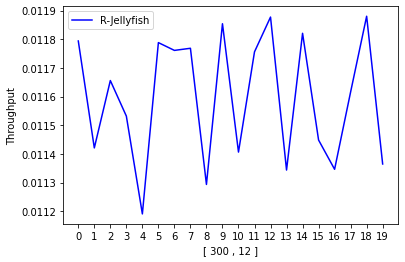

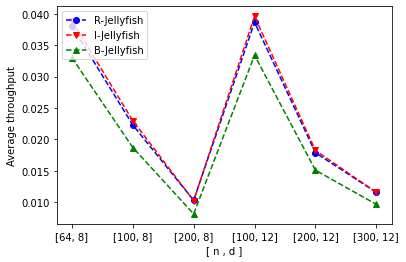

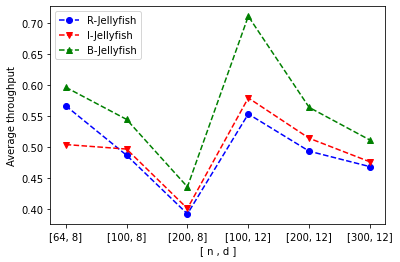

In [20]:
def assemble_data(dic1):
  x=range(len(dic1))
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  ax1.plot(x, dic1, color='b', label="R-Jellyfish")

  plt.legend(loc="upper left");
  ax1.set_xlabel("[ 300 , 12 ]")
  ax1.set_ylabel("Throughput")
  ax1.set_xticks(x)



def assemble_average(dic1,dic2,dic3,para,file_name):
  
  
  x = range(len(para))
  fig = plt.figure()
  ax1 = fig.add_subplot(111)

  ax1.plot(x, dic1, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', label="R-Jellyfish")
  ax1.plot(x, dic2, color='red', linestyle='dashed', marker='v', markerfacecolor='red', label="I-Jellyfish")
  ax1.plot(x, dic3, color='green', linestyle='dashed', marker='^', markerfacecolor='green', label="B-Jellyfish")
  plt.legend(loc="upper left");
  ax1.set_xlabel("[ n , d ]")
  ax1.set_ylabel("Average throughput")
  ax1.set_xticks(x)
  ax1.set_xticklabels(para)
  plt.savefig("/content/drive/My Drive/Colab Notebooks//%s_plot.png" % file_name)



#test
tem=[]
for t in RrAll['300','12']:
  tem.append(float(t[0]))
# print(tem)
assemble_data(tem)

assemble_average(RrAllAvg,IrAllAvg,BrAllAvg,parameters,"AllAvg")
assemble_average(RrRandAvg,IrRandAvg,BrRandAvg,parameters,"RandAvg")

